In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('../insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df[["charges"]], df["smoker"], test_size=0.2)

knnmodel= KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train,y_train)
y_pred=knnmodel.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.98      0.95      0.96       233
         yes       0.71      0.86      0.78        35

    accuracy                           0.94       268
   macro avg       0.85      0.90      0.87       268
weighted avg       0.94      0.94      0.94       268



In [103]:
model = KNeighborsClassifier().fit(X_train,y_train)
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsClassifier())
])
pipe.fit(X_train,y_train)
pred= pipe.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

          no       0.98      0.93      0.95       212
         yes       0.78      0.91      0.84        56

    accuracy                           0.93       268
   macro avg       0.88      0.92      0.90       268
weighted avg       0.94      0.93      0.93       268



In [64]:
import seaborn as sns

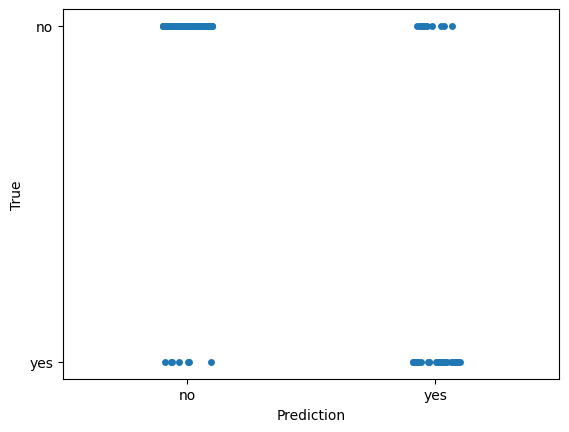

In [92]:
testing = np.array(y_test)
plot_data={'Prediction':pred,'True':testing}
plotFrame=pd.DataFrame(plot_data)
sns.stripplot(x='Prediction',y='True',data=plotFrame,jitter=True)
plt.title('')
plt.show()

In [91]:
len(y_test[y_test=='no']),len(y_test[y_test=='yes'])

(230, 38)

In [90]:
len(pred[pred=='no']),len(pred[pred=='yes'])

(226, 42)